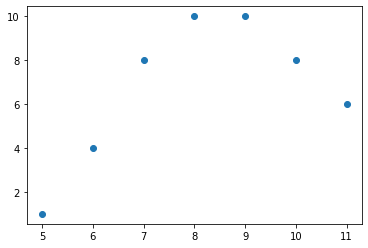

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(5, 12)
sinal = [1, 4, 8, 10, 10, 8, 6]
plt.plot(x, sinal, 'o')

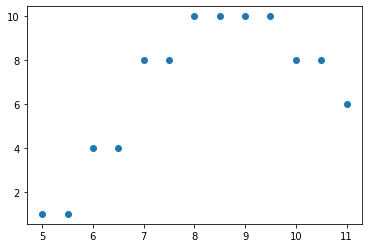

In [6]:
def interpolacao_vizinho_2x(sinal):
    
    sinal_interp = np.zeros(2*len(sinal)-1)
    for indice in range(len(sinal)-1):
        indice_interp = 2*indice
        sinal_interp[indice_interp] = sinal[indice]
        sinal_interp[indice_interp+1] = sinal[indice]
    sinal_interp[-1] = sinal[-1]
    
    return sinal_interp

x_interp = np.arange(5, 11.5, 0.5)
sinal_interp = interpolacao_vizinho_2x(sinal)

plt.plot(x_interp, sinal_interp, 'o')

## 1.2 Interpolação linear
    *equacao* kk

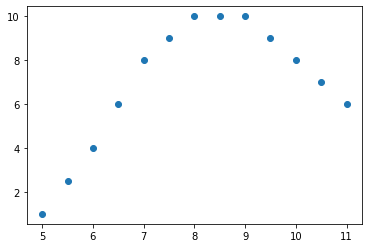

In [8]:
def interpolacao_linear_2x(sinal, x, x_interp):
    
    sinal_interp = np.zeros(2*len(sinal)-1)
    for indice in range(len(sinal)-1):
        
        indice_interp = 2*indice
        sinal_interp[indice_interp] = sinal[indice]
        
        x_e = x[indice]
        x_d = x[indice+1]
        y_e = sinal[indice]
        y_d = sinal[indice+1]
        
        y_x = y_e + ((y_d-y_e)/(x_d-x_e))*(x_interp[indice_interp+1]-x_e)
        sinal_interp[indice_interp+1]= y_x
        
    sinal_interp[-1] = sinal[-1]
    
    return sinal_interp

x_interp = np.arange(5, 11.5, 0.5)
sinal_interp = interpolacao_linear_2x(sinal, x, x_interp)
plt.plot(x_interp, sinal_interp, 'o')

## Interpolação usando correlação-cruzada

In [14]:
from scipy.signal import correlate

def upsample_2x(sinal, filtro):
    
    sinal_upsampled = np.zeros(2*len(sinal)-1)
    for indice in range(len(sinal)-1):
        indice_interp = 2*indice
        sinal_upsampled[indice_interp] = sinal[indice]
        
    sinal_upsampled[-1] = sinal[-1]
    
    sinal_interp = correlate(sinal_upsampled, filtro, mode='same')
    
    return sinal_interp

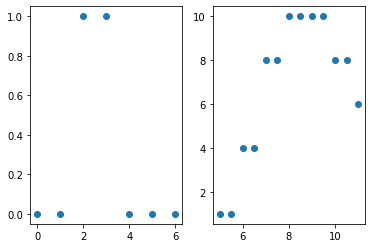

In [16]:
x_interp = np.arange(5, 11.5, 0.5)
w = np.zeros(7)
w[2:4] = 1

sinal_interp_0 = upsample_2x(sinal, w)

plt.subplot(1, 2, 1)
plt.plot(w, 'o')
plt.subplot(1, 2, 2)
plt.plot(x_interp, sinal_interp_0, 'o')

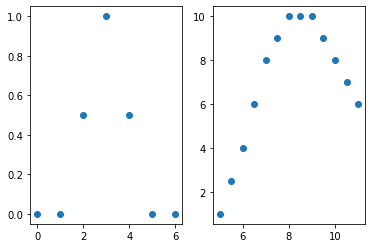

In [17]:
w2 = correlate(w, w, mode='same')
w2 = w2/2
sinal_interp_1 = upsample_2x(sinal, w2)

plt.subplot(1, 2, 1)
plt.plot(w2, 'o')
plt.subplot(1, 2, 2)
plt.plot(x_interp, sinal_interp_1, 'o')

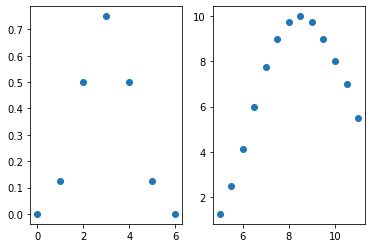

In [20]:
w3 = correlate(w2, w2, mode='same')
w3 = w3/2
sinal_interp_2 = upsample_2x(sinal, w3)

plt.subplot(1, 2, 1)
plt.plot(w3, 'o')
plt.subplot(1, 2, 2)
plt.plot(x_interp, sinal_interp_2, 'o')

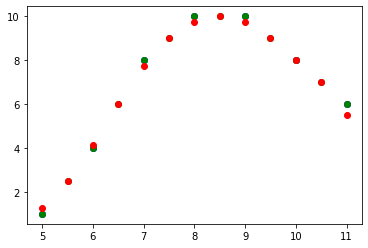

In [21]:
plt.plot(x, sinal, 'bo')
plt.plot(x_interp, sinal_interp_1, 'go')
plt.plot(x_interp, sinal_interp_2, 'ro')

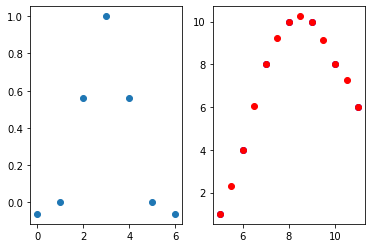

In [27]:
w_c = [-0.0625, 0, 0.5625, 1, 0.5625, 0, -0.0625]
sinal_interp_c = upsample_2x(sinal, w_c)

plt.subplot(1, 2, 1)
plt.plot(w_c, 'o')
plt.subplot(1, 2, 2)
plt.plot(x, sinal, 'bo')
plt.plot(x_interp, sinal_interp_c, 'ro')

## Interpolação de imagem

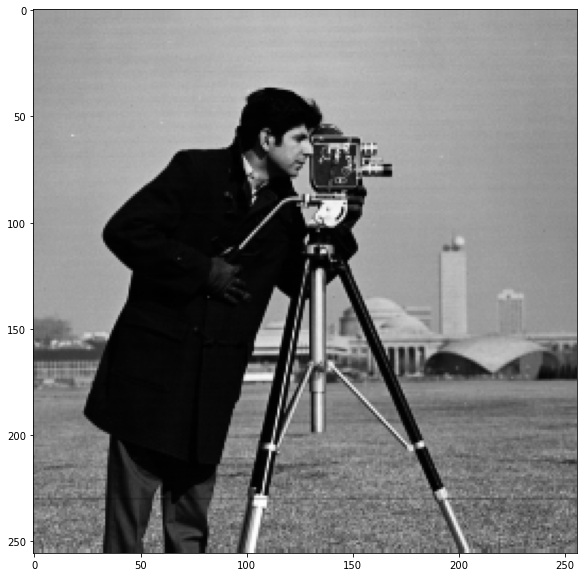

In [28]:
img = plt.imread('imgs/cameraman.tiff')
plt.figure(figsize=[10,10])
plt.imshow(img, 'gray')

In [29]:
def upsample_2x_2d(img, filtro):
    
    num_rows, num_cols = img.shape
    img_upsampled = np.zeros((2*num_rows-1, 2*num_cols-1))
    for row in range(num_rows):
        for col in range(num_cols):
            img_upsampled[2*row, 2*col] = img[row, col]
    
    img_upsampled[-1, ::-2] = img[-1]
    img_upsampled[::-2, -1] = img[:, -1]
    
    img_interp = correlate(img_upsampled, filtro, mode='same')
    
    return img_interp

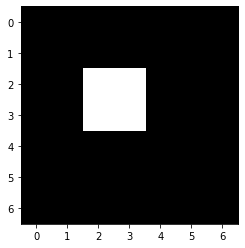

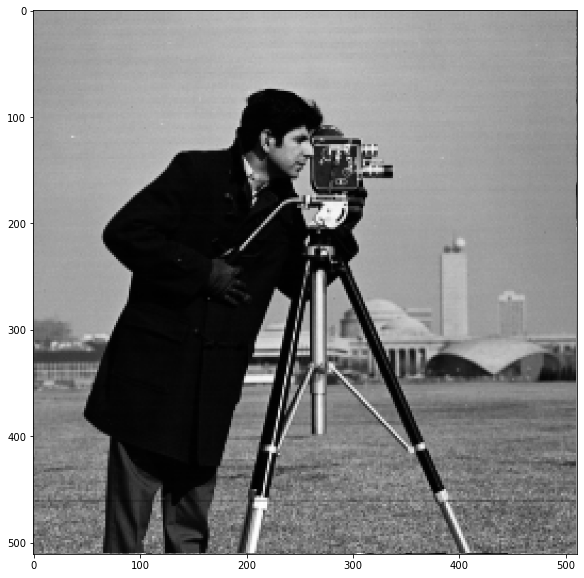

In [31]:
w = np.zeros((7, 7))
w[2:4, 2:4] = 1

img_interp_0 = upsample_2x_2d(img, w)

plt.imshow(w, 'gray')
plt.figure(figsize=[10,10])
plt.imshow(img_interp_0, 'gray')

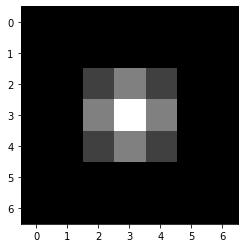

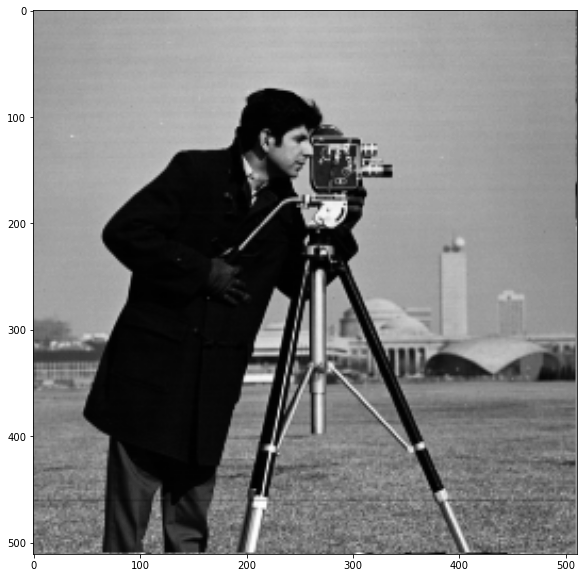

In [34]:
w2 = correlate(w, w, mode='same')
w2 = w2/4
img_interp_1 = upsample_2x_2d(img, w2)

plt.imshow(w2, 'gray')
plt.figure(figsize=[10,10])
plt.imshow(img_interp_1, 'gray')

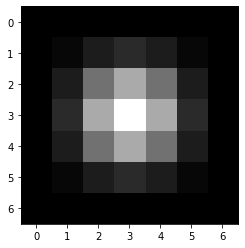

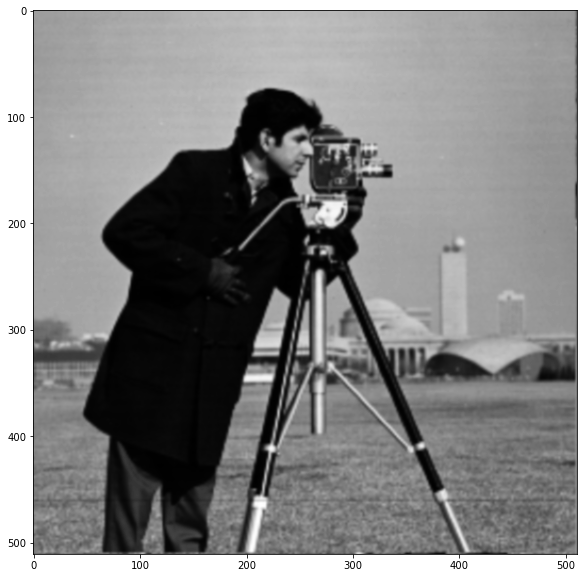

In [35]:
w3 = correlate(w2, w2, mode='same')
w3 = w3/4
img_interp_2 = upsample_2x_2d(img, w3)

plt.imshow(w3, 'gray')
plt.figure(figsize=[10,10])
plt.imshow(img_interp_2, 'gray')

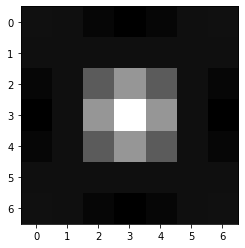

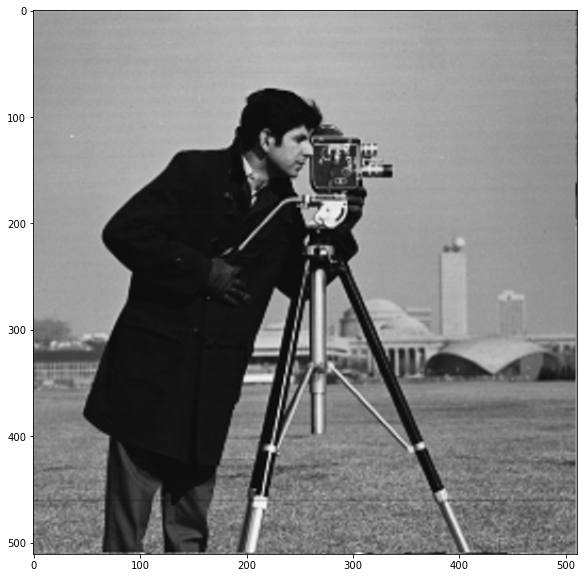

In [37]:
w_c = np.array([[-0.0625, 0, 0.5625, 1, 0.5625, 0, -0.0625]])
w_c2d = np.dot(w_c.T, w_c)
img_interp_c = upsample_2x_2d(img, w_c2d)

plt.imshow(w_c2d, 'gray')
plt.figure(figsize=[10,10])
plt.imshow(img_interp_c, 'gray')

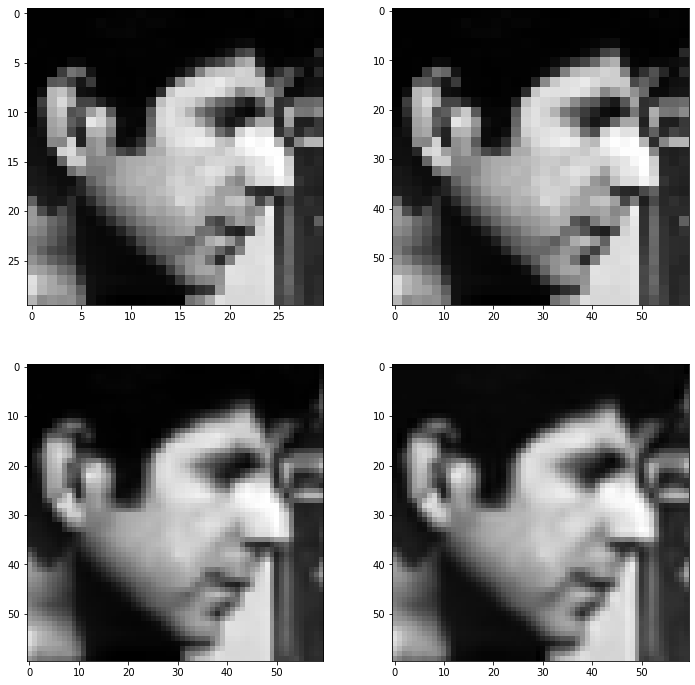

In [42]:
plt.figure(figsize=[12, 12])
plt.subplot(2, 2, 1)
plt.imshow(img[50:80, 105:135], 'gray')
plt.subplot(2, 2, 2)
plt.imshow(img_interp_0[100:160, 210:270], 'gray')
plt.subplot(2, 2, 3)
plt.imshow(img_interp_1[100:160, 210:270], 'gray')
plt.subplot(2, 2, 4)
plt.imshow(img_interp_c[100:160, 210:270], 'gray')

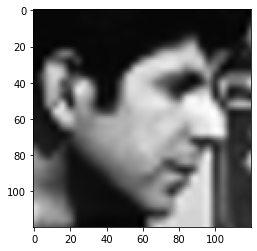

In [46]:
img_interp_c2 = upsample_2x_2d(img_interp_c, w_c2d)
plt.imshow(img_interp_c2[200:320, 420:540], 'gray')